In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [101]:
#f = r.TFile("gm2offline_full.root")
f = r.TFile("gm2offline_full_NoTimeCorrector.root")
#f = r.TFile("gm2offline_full_Dec1.root")
t = f.Get("nearlineHistTree/eventTree")

In [102]:
f.cd("t0Analyzer")
#f.ls()

t2 = f.Get("t0Analyzer/t0Tree")
t2.Print()

******************************************************************************
*Tree    :t0Tree    : t0Tree                                                 *
*Entries :      864 : Total =       209634734 bytes  File  Size =   59899390 *
*        :          : Tree compression factor =   3.50                       *
******************************************************************************
*Br    0 :tracetubeA : vector<int>                                           *
*Entries :      864 : Total  Size=   34622319 bytes  File Size  =    7054874 *
*Baskets :      434 : Basket Size=   17084145 bytes  Compression=   4.91     *
*............................................................................*
*Br    1 :sampleNums : vector<unsigned int>                                  *
*Entries :      864 : Total  Size=   34625775 bytes  File Size  =   12103482 *
*Baskets :      434 : Basket Size=   17084145 bytes  Compression=   2.86     *
*...................................................

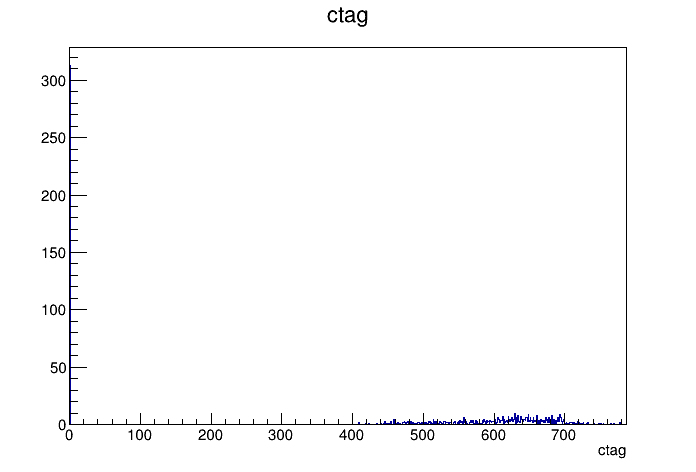

In [84]:
c = r.TCanvas()
t.Draw("ctag")
c.Draw()

In [104]:
Nruns = t.Draw("runNum:subRunNum","","goff")
runs = []
for i in range(Nruns):
    runs.append(int(t.GetV1()[i]))
runs = list(set(runs))
if(len(runs) > 1):
    print("ERROR: More than one run")
    print(runs)
else:
    runNum = runs[0]
    
Nsubruns = Nruns
#Nsubruns = t.Draw("subRunNum","","goff")
print(Nsubruns, "entries")
subruns = []
for i in range(Nsubruns):
    subruns.append(int(t.GetV2()[i]))
subruns = list(set(subruns))
print("Run:     ", runNum)
print("Subruns: ",subruns)

864 entries
Run:      30391
Subruns:  [3, 4, 5, 6, 7, 8]


In [105]:
h = r.TH2D("h","Number of Sync Pulses in Each Fill by Calorimeter; Fill Number; Calo Number",
          200,0,400,
          26*2,0,26)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


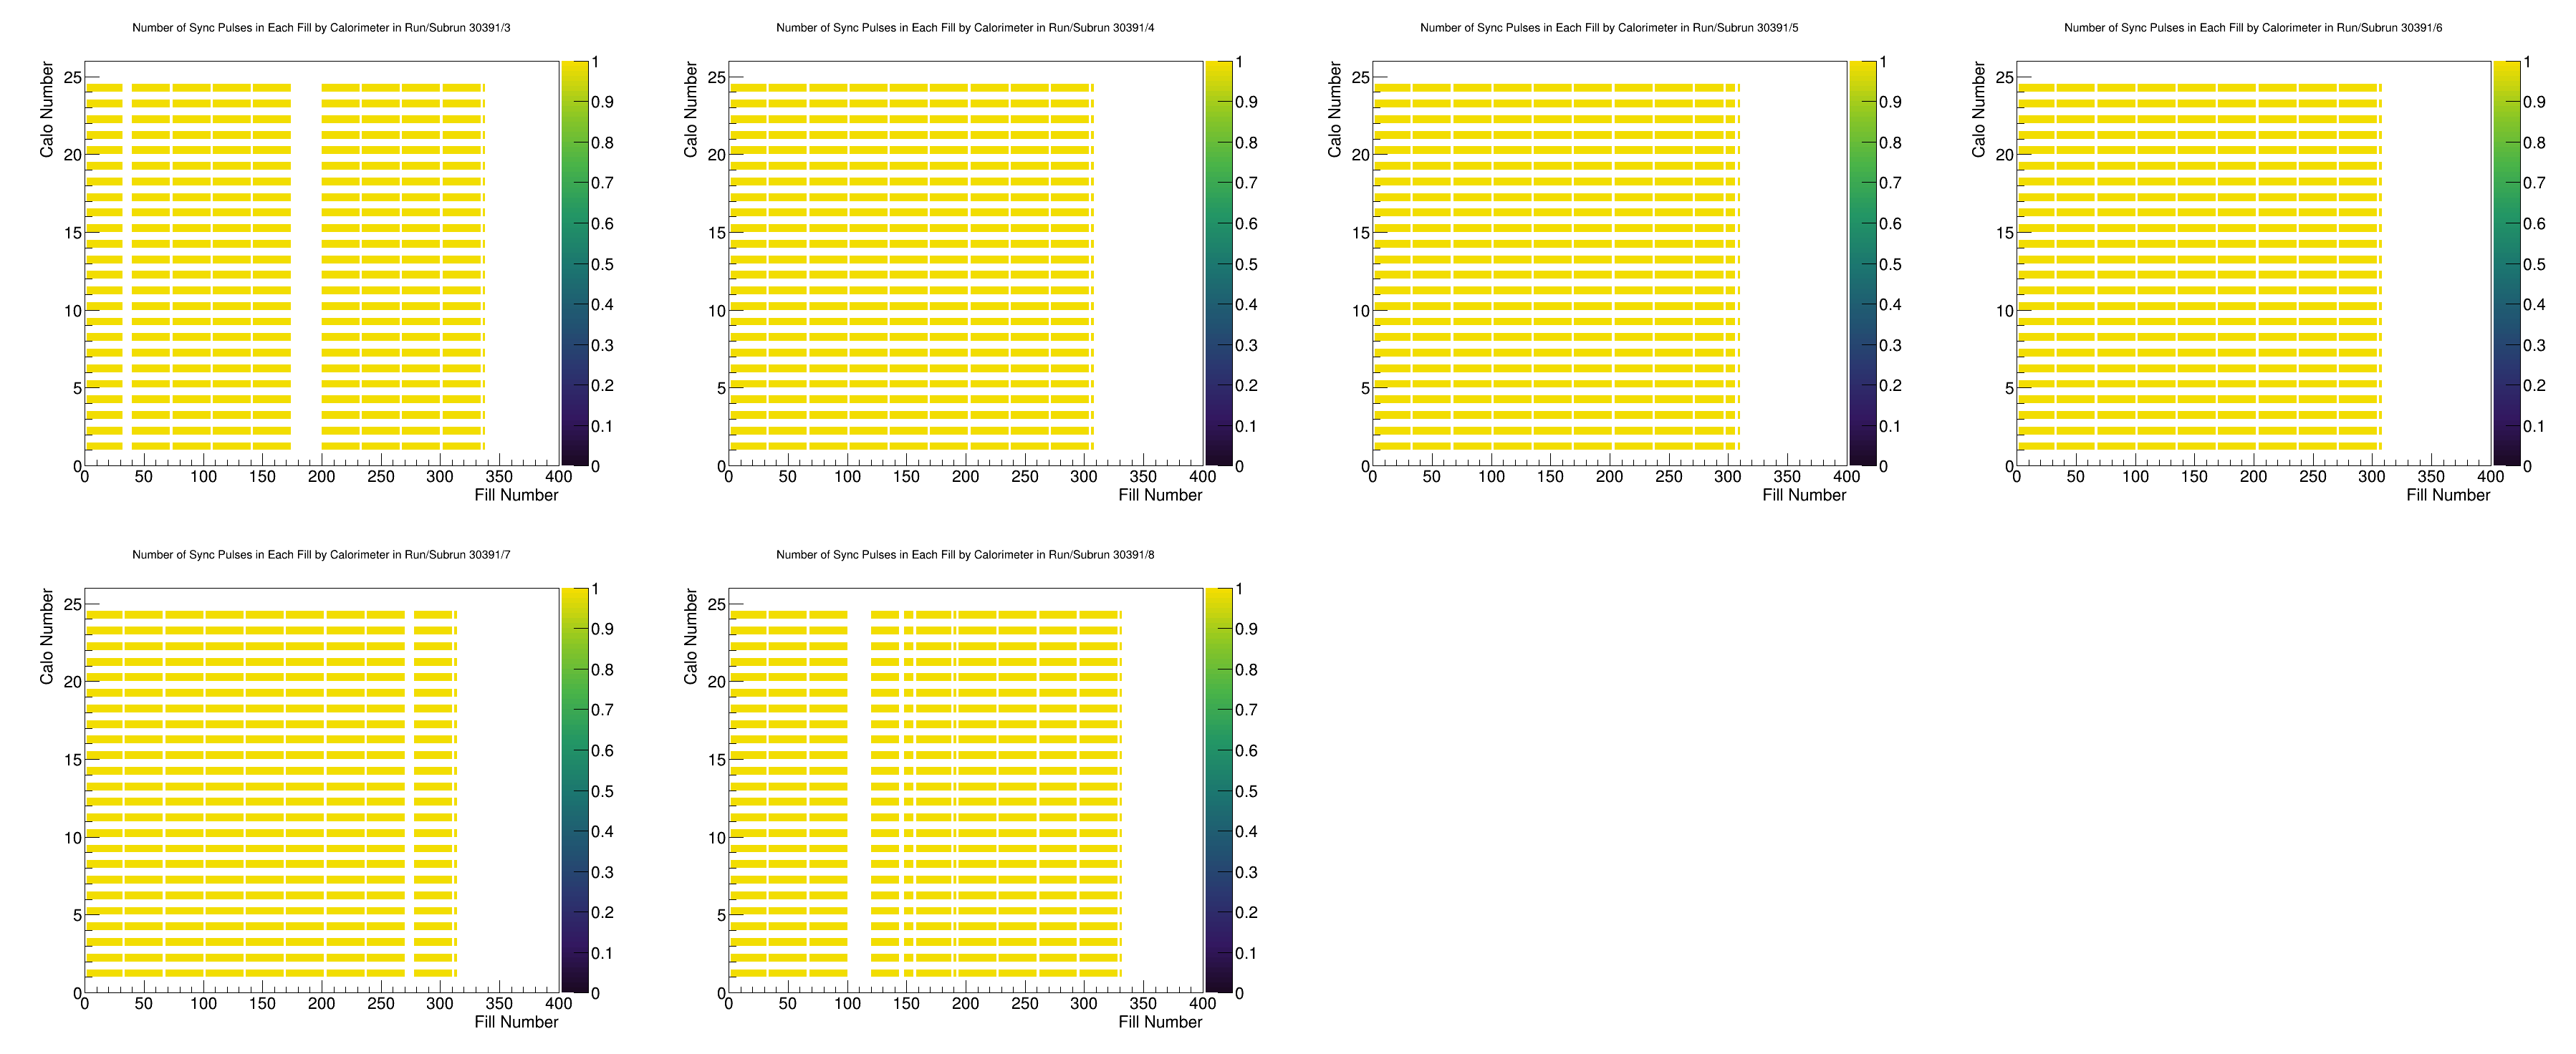

In [106]:
c = r.TCanvas("c","c",3600,1500)
c.Divide(4,int(np.ceil(len(subruns)/4)))
allhists = []
for i in subruns:
    h.Reset()
    t.Draw("caloNum:eventNum>>h","energy > 20000 && time < 10000 && subRunNum == "+str(i),"goff")
    #t.Draw("caloNum:eventNum>>h","energy > 20000 && time < 0 && subRunNum == "+str(i),"goff")
    h.SetTitle("Number of Sync Pulses in Each Fill by Calorimeter in Run/Subrun "+str(runNum)+"/"+str(i))
    allhists.append(h.Clone("h_"+str(i)))
    c.cd(len(allhists))
    allhists[len(allhists)-1].DrawCopy("colz")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


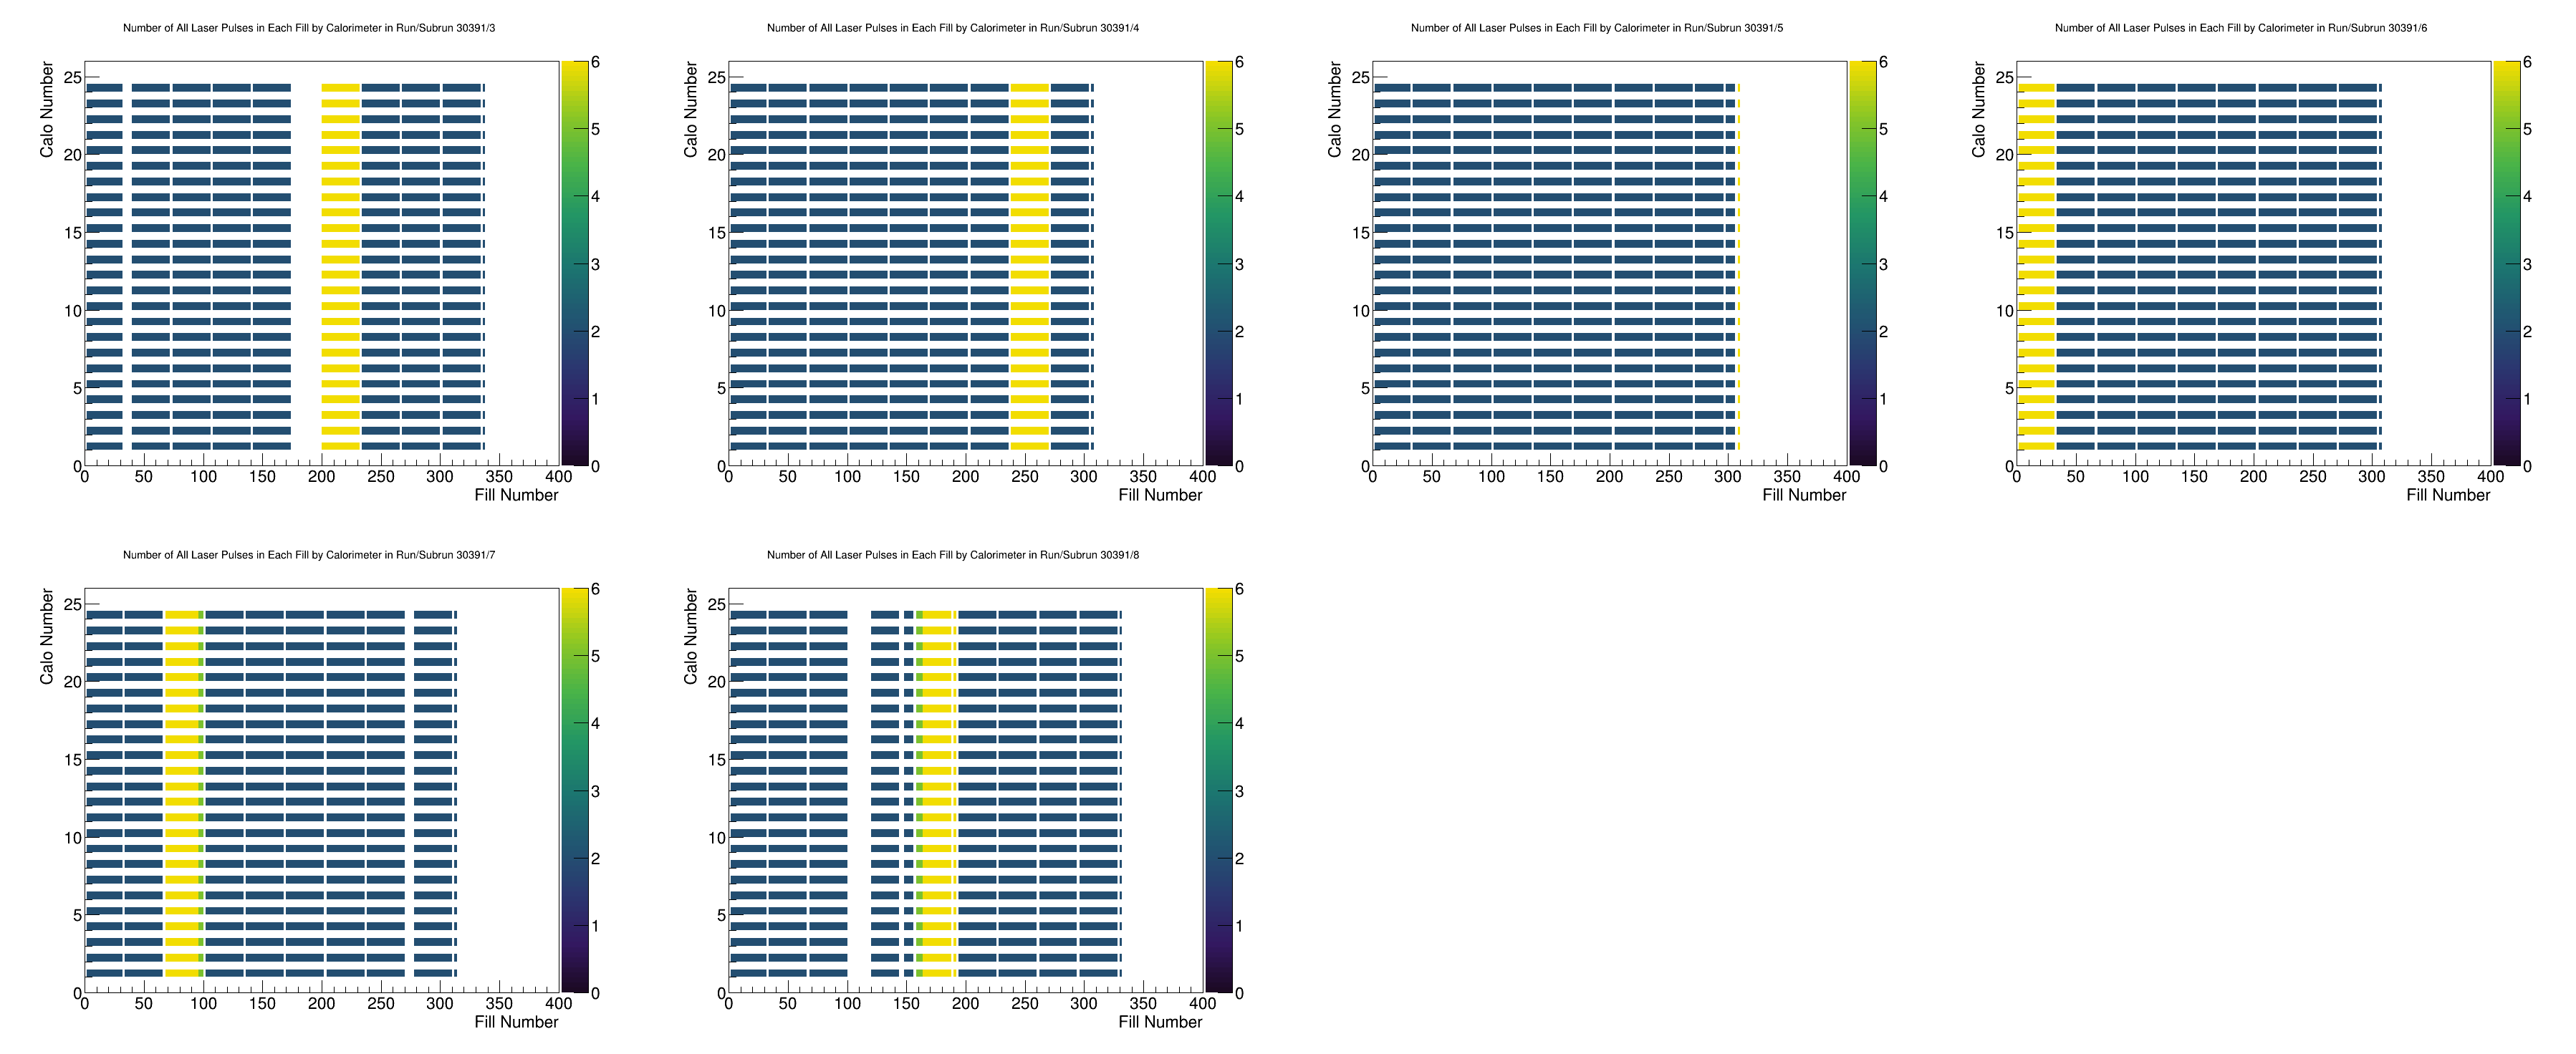

In [107]:
c = r.TCanvas("c","c",3600,1500)
c.Divide(4,int(np.ceil(len(subruns)/4)))
allhists = []
for i in subruns:
    h.Reset()
    t.Draw("caloNum:eventNum>>h","energy > 20000 && subRunNum == "+str(i),"goff")
    #t.Draw("caloNum:eventNum>>h","energy > 20000 && time < 0 && subRunNum == "+str(i),"goff")
    h.SetTitle("Number of All Laser Pulses in Each Fill by Calorimeter in Run/Subrun "+str(runNum)+"/"+str(i))
    allhists.append(h.Clone("h_"+str(i)))
    c.cd(len(allhists))
    allhists[len(allhists)-1].DrawCopy("colz")
c.Draw()

In [115]:
i = subruns[0]
print(i)

3


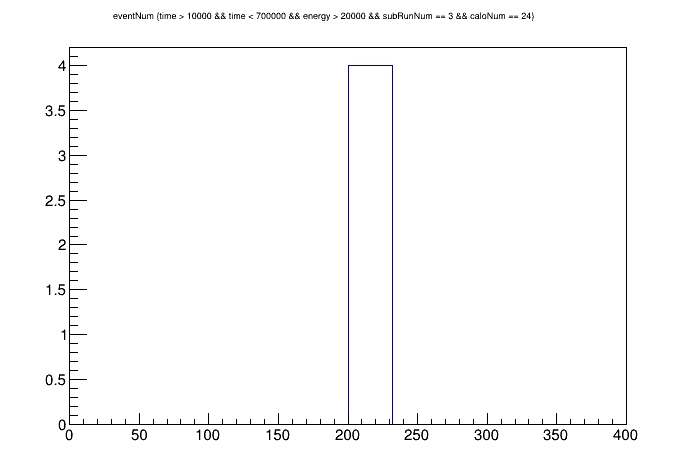

In [116]:
c = r.TCanvas()
t.Draw("eventNum>>hist(200,0,400)","time > 10000 && time < 700000 && energy > 20000 && subRunNum == "+str(i)+" && caloNum == 24","")
c.Draw()

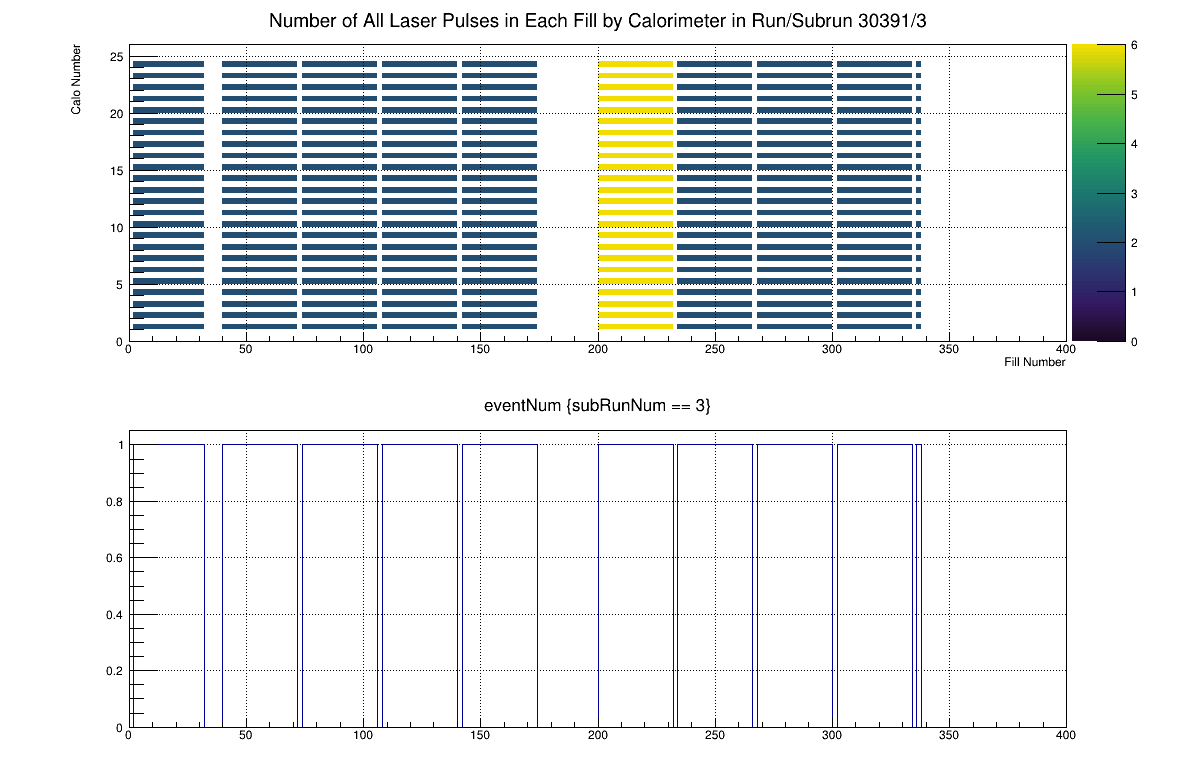

In [117]:
c = r.TCanvas("c","c",1200,800)
c.Divide(1,2)

c.cd(1)
allhists[subruns.index(i)].Draw("colz")
r.gPad.SetGrid()

c.cd(2)
t2.Draw("eventNum>>hist(200,0,400)",
        "subRunNum == "+str(i),
        #"time > 10000 && time < 700000 && energy > 20000 && subRunNum == "+str(i)+" && caloNum == 24",
        "")
r.gPad.SetGrid()
c.Draw()

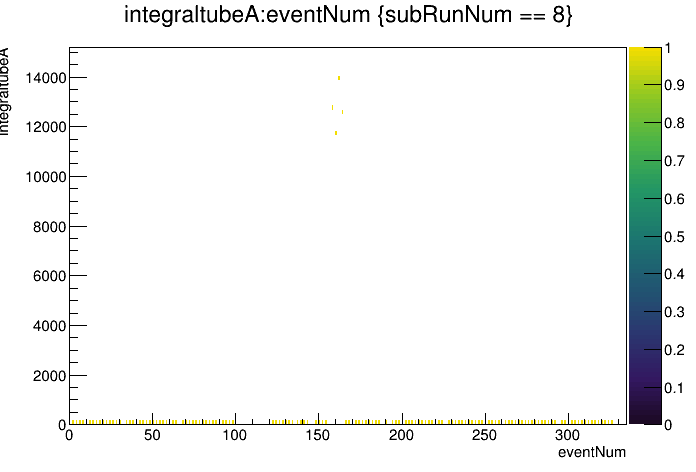

In [81]:
c = r.TCanvas()
t2.Draw("integraltubeA:eventNum",
        "subRunNum == "+str(i),
        #"time > 10000 && time < 700000 && energy > 20000 && subRunNum == "+str(i)+" && caloNum == 24",
        "colz")
c.Draw()

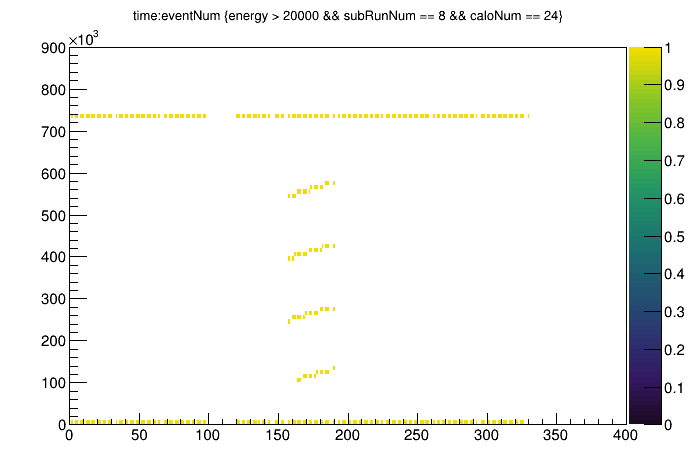

In [72]:
c = r.TCanvas()
t.Draw("time:eventNum>>hist(300,0,400,90,0,900000)","energy > 20000 && subRunNum == "+str(i)+" && caloNum == 24","colz")
c.Draw()

In [28]:
h = r.TH1D("h","Number of Sync Pulses in Each Fill by Calorimeter; Calo Number",
          #200,0,400,
          26,0,26)

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


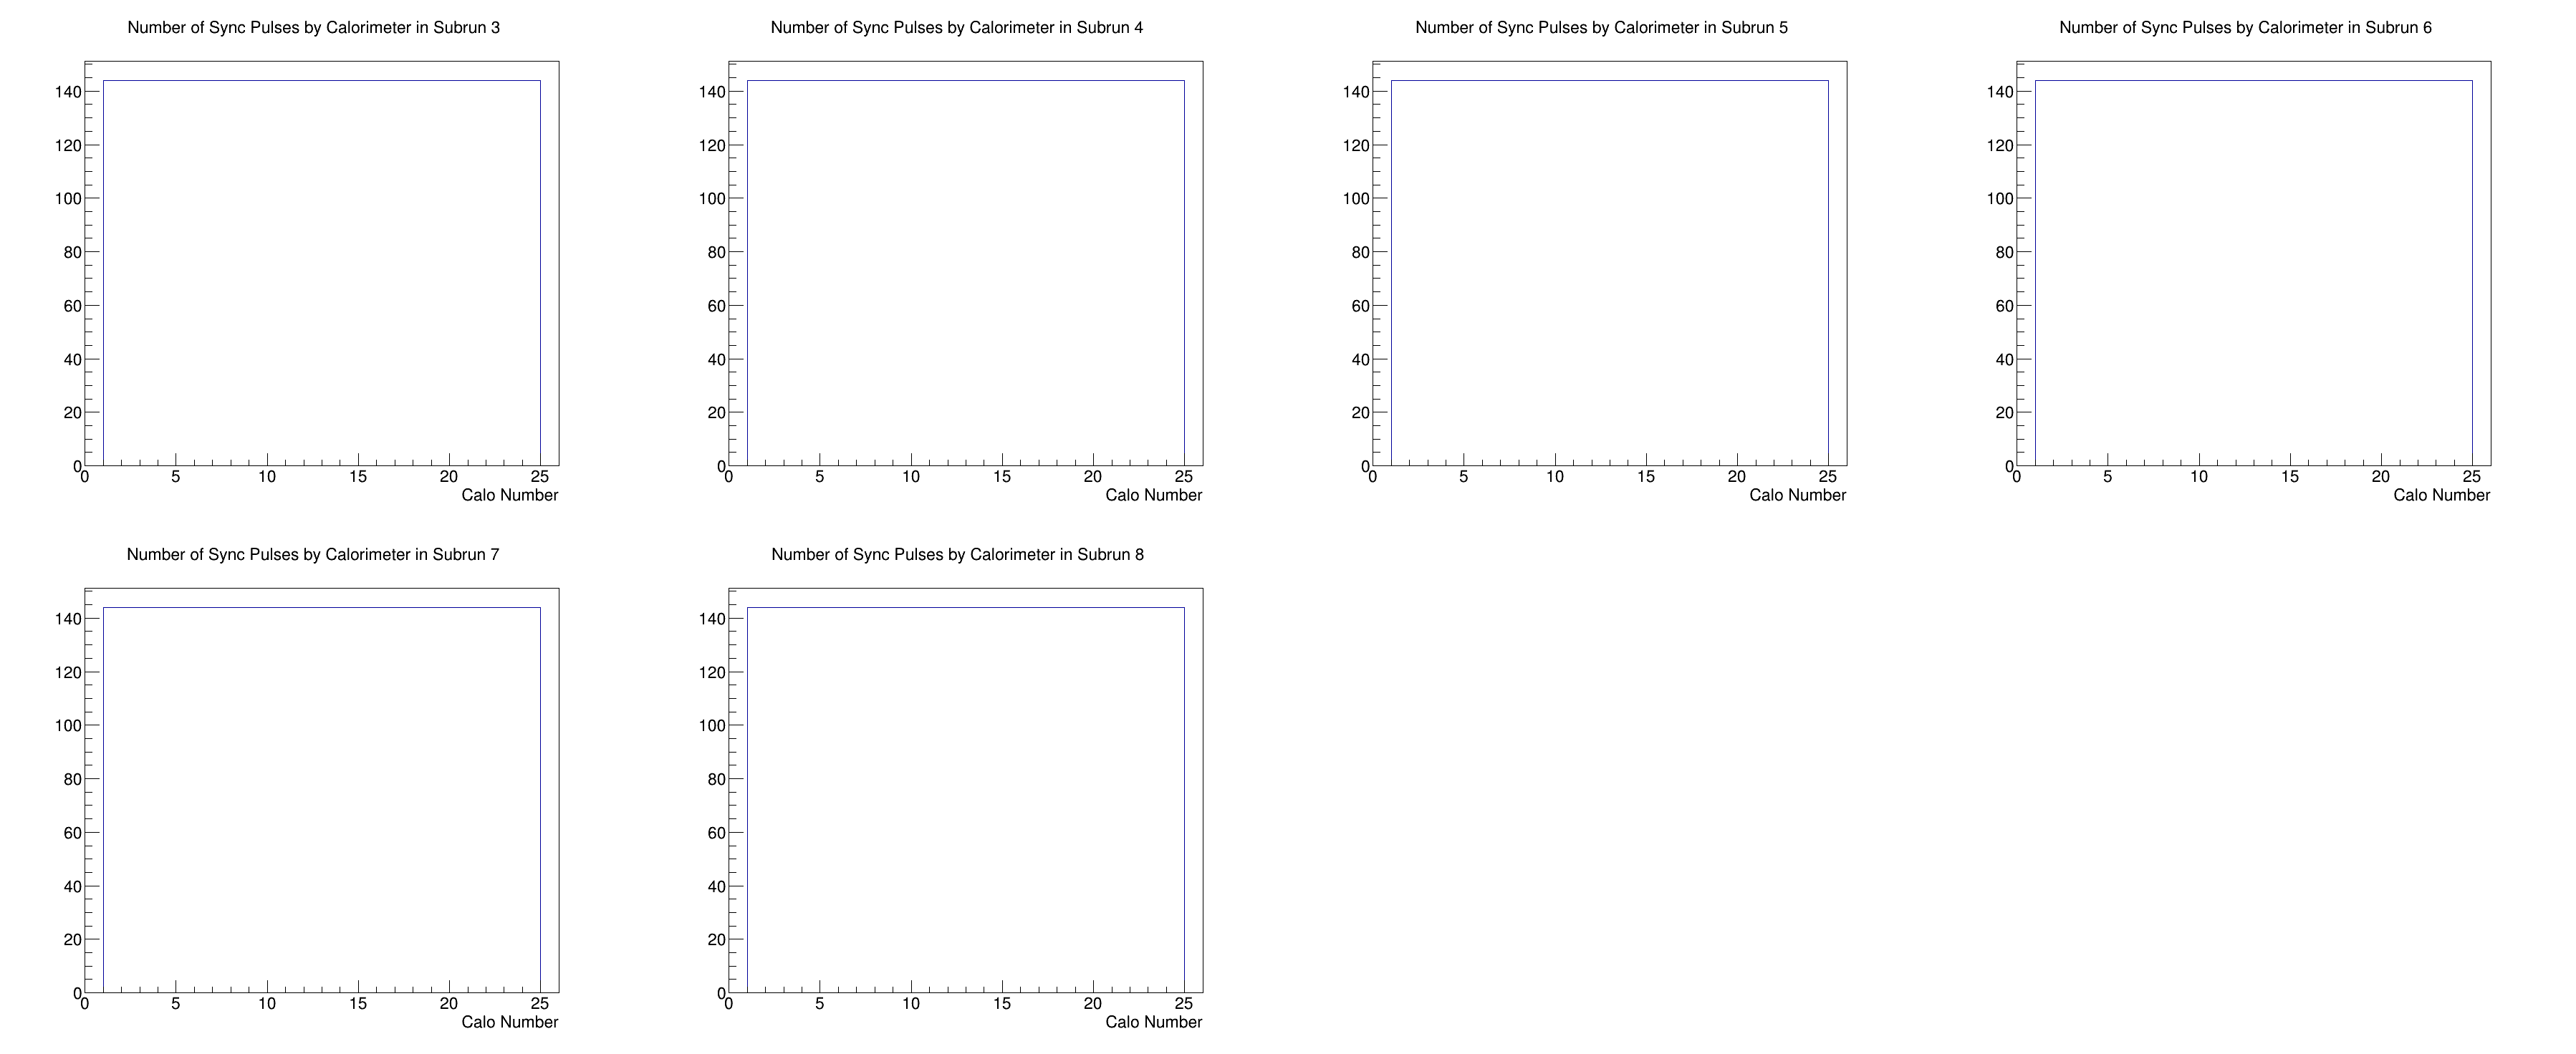

In [30]:
c = r.TCanvas("c","c",3600,1500)
c.Divide(4,2)
allhists = []
for i in subruns:
    h.Reset()
    t.Draw("caloNum>>h","energy > 20000 && time < 10000 && subRunNum == "+str(i),"goff")
    h.SetTitle("Number of Sync Pulses by Calorimeter in Subrun "+str(i))
    allhists.append(h.Clone("h_"+str(i)))
    c.cd(len(allhists))
    allhists[len(allhists)-1].DrawCopy("colz")
c.Draw()

In [47]:
h = r.TH2D("h","Timing of Sync Pulses; Fill; Time [c.t.]",
            400,0,400,
            200,5500,5650)

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


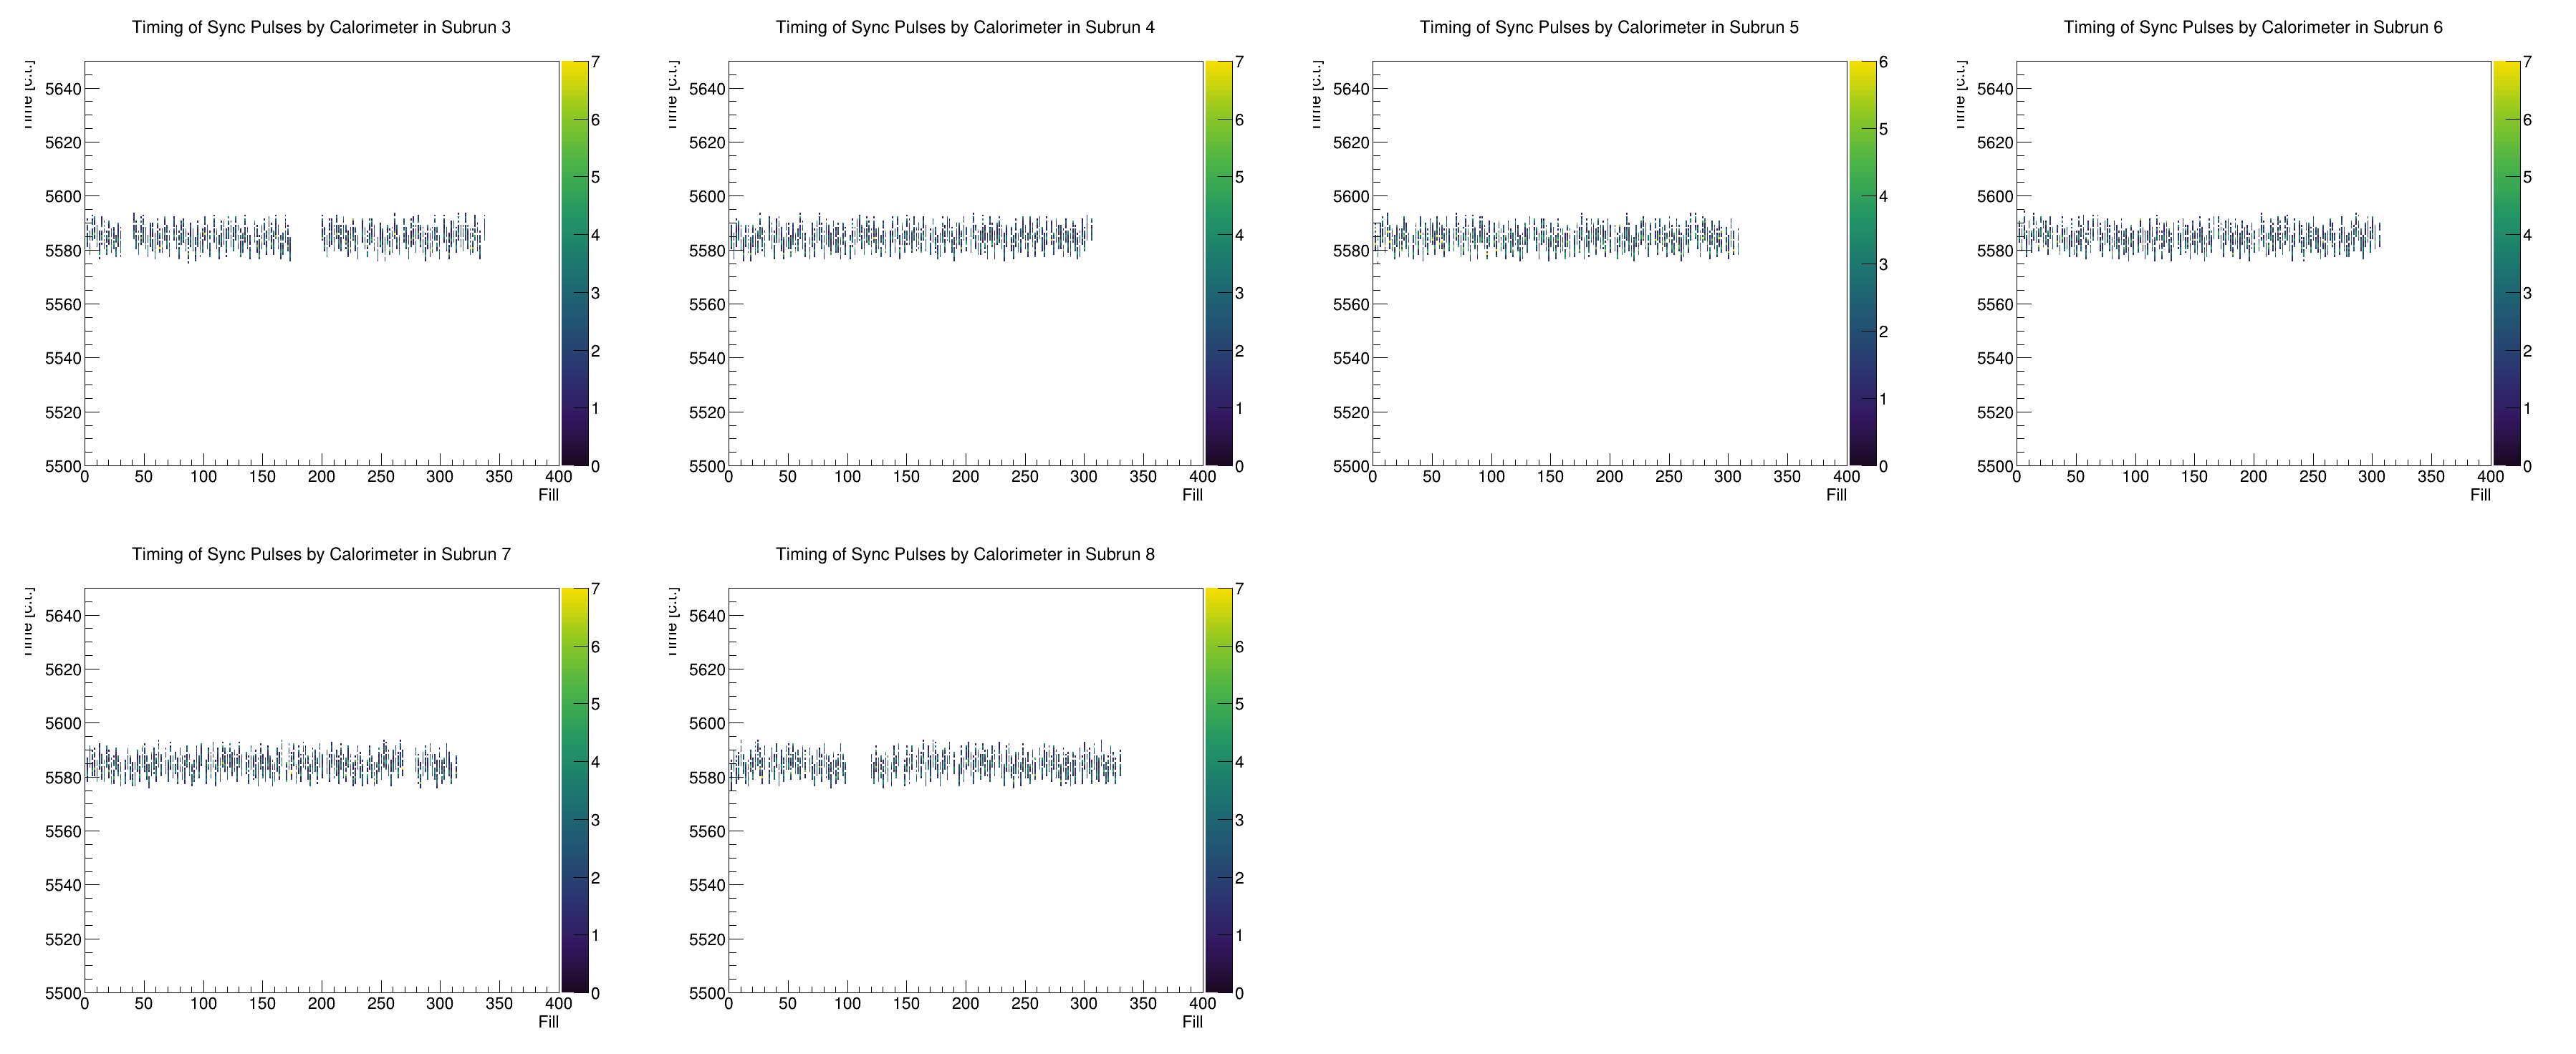

In [48]:
c = r.TCanvas("c","c",3600,1500)
c.Divide(4,2)
allhists = []
for i in subruns:
    h.Reset()
    h.SetTitle("Timing of Sync Pulses by Calorimeter in Subrun "+str(i))
    t.Draw("time:eventNum>>h","energy > 20000 && time < 10000 && subRunNum == "+str(i),"goff")
    allhists.append(h.Clone("h_"+str(i)))
    c.cd(len(allhists))
    allhists[len(allhists)-1].DrawCopy("colz")
c.Draw()

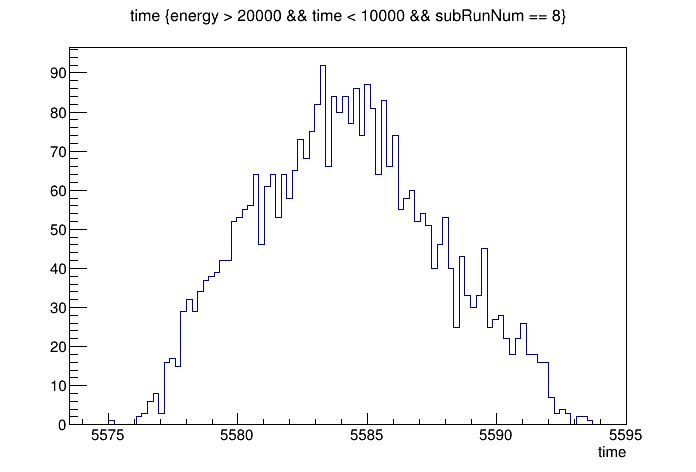

In [49]:
c = r.TCanvas()

t.Draw("time","energy > 20000 && time < 10000 && subRunNum == "+str(i),"")

c.Draw()